In [1]:
import torch
import sys
import os
sys.path.append(os.path.abspath("..")) 

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("GPU name:", torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
print(f'Using device: {device}')

from dataloader.dataloader import load_MNIST_data,load_CINIC10_data,load_CIFAR10_data,load_Fmnist_data
from train.training import train_nomal,train_for_DEQ
from train.evaluate import plot_loss_curve,plot_errorbar_losscurve,plot_confusion_matrix,plot_histograms,create_table,save_csv,convergence_verify,auto_git_push

Using device: cpu


1/1th Epoch:1/10(100.00%) 

Epoch 1/10:Time=14.56


1/1th Epoch:2/10(100.00%) 

Epoch 2/10:Time=13.60


1/1th Epoch:3/10(100.00%) 

Epoch 3/10:Time=13.77


1/1th Epoch:4/10(100.00%) 

Epoch 4/10:Time=13.54


1/1th Epoch:5/10(100.00%) 

Epoch 5/10:Time=14.99


1/1th Epoch:6/10(100.00%) 

Epoch 6/10:Time=14.66


1/1th Epoch:7/10(100.00%) 

Epoch 7/10:Time=14.09


1/1th Epoch:8/10(100.00%) 

Epoch 8/10:Time=10.32


1/1th Epoch:9/10(100.00%) 

Epoch 9/10:Time=11.10


1/1th Epoch:10/10(100.00%) 

Epoch 10/10:Time=10.37


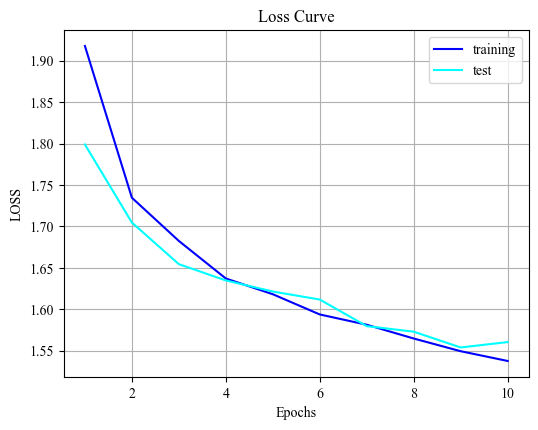

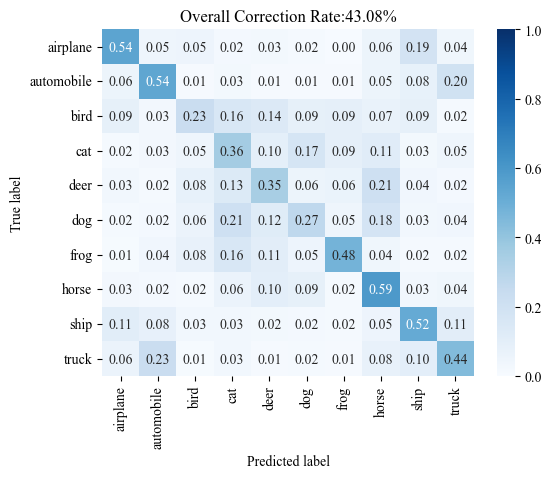

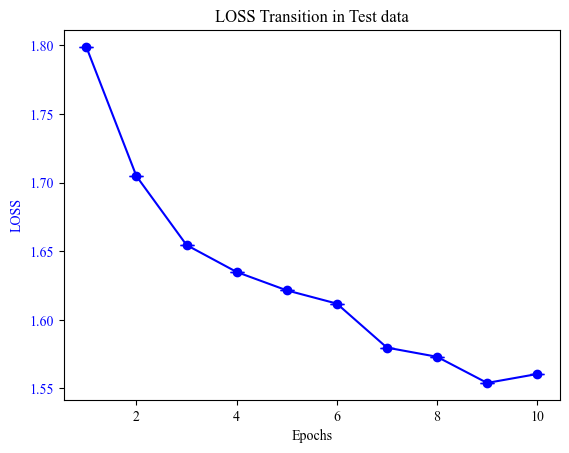

            Average  Best ID        Best  Worst ID       Worst
0   ACC   43.080000        1   43.080000         1   43.080000
1  LOSS    1.560483        1    1.560483         1    1.560483
2  TIME  131.005722        1  131.005722         1  131.005722
/Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_cinic-10
Saved at: /Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_cinic-10/PM_CNN_6190120.csv


In [3]:
#data---------------------------------------------
dataset = 'cinic-10' # 'mnist', 'cifar-10', 'cinic-10' , 'fashion-mnist'
batch_size = 100 #64 MNIST, 100 CIFAR10, 100 CINIC10
#Encoder_Model--------------------------------
enc_type = 'PM' # 'none', 'MZM', 'LI'
cls_type = 'CNN' # 'MLP' or 'CNN'
#class_model--------------------------------------
num_layer = 2
fc ='relu'
#learning-----------------------------------------
loss_func = 'cross_entropy'
optimizer = 'adam'
lr = 0.001
#param--------------------------------------------
num_try = 1
max_epochs = 10
leverage = 8 #enc is not none
kernel_size =4
#save---------------------------------------------
folder = f'Class_{dataset}'
ex_name= f'{enc_type}_{cls_type}'

data_loaders = {
    'cifar-10': load_CIFAR10_data,
    'cinic-10': load_CINIC10_data,
    'mnist': load_MNIST_data,
    'fashion-mnist':load_Fmnist_data
}

data_train,data_test = data_loaders[dataset]()
if enc_type == 'none':
    leverage = 1

All_last_loss = []
All_loss_test = []
All_pro_time = []
All_test_acc = []
for num_times in range(num_try):

    loss_train_,loss_test_,pro_time_,Last_loss_test,Test_acc,all_labels,all_preds = train_nomal(dataset,loss_func,optimizer,lr,num_times,num_try,data_train,data_test,batch_size,device,max_epochs,leverage,enc_type,cls_type,num_layer,fc,kernel_size)

    All_loss_test.append(loss_test_)
    All_pro_time.append(sum(pro_time_))
    All_last_loss.append(Last_loss_test)
    All_test_acc.append(Test_acc)

    plot_loss_curve(loss_train_,loss_test_)
    plot_confusion_matrix(all_labels,all_preds,dataset,Test_acc)

plot_errorbar_losscurve(All_loss_test)
create_table(All_test_acc,All_last_loss,All_pro_time)
save_csv(folder,ex_name,All_loss_test)

1/1th Epoch:1/10(100.00%) 

Epoch 1/10:Time=8.16


1/1th Epoch:2/10(100.00%) 

Epoch 2/10:Time=7.97


1/1th Epoch:3/10(100.00%) 

Epoch 3/10:Time=7.75


1/1th Epoch:4/10(100.00%) 

Epoch 4/10:Time=8.02


1/1th Epoch:5/10(100.00%) 

Epoch 5/10:Time=8.53


1/1th Epoch:6/10(100.00%) 

Epoch 6/10:Time=7.82


1/1th Epoch:7/10(100.00%) 

Epoch 7/10:Time=7.94


1/1th Epoch:8/10(100.00%) 

Epoch 8/10:Time=7.98


1/1th Epoch:9/10(100.00%) 

Epoch 9/10:Time=7.93


1/1th Epoch:10/10(100.00%) 

Epoch 10/10:Time=8.03


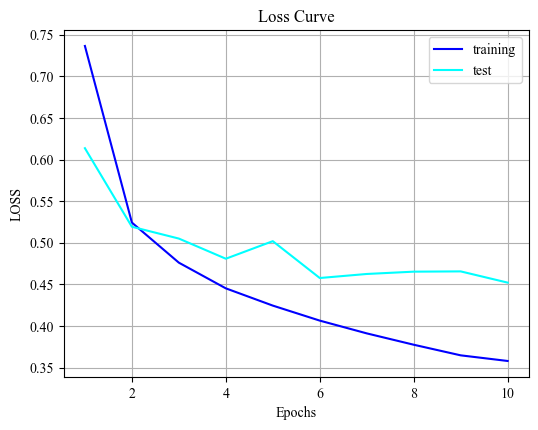

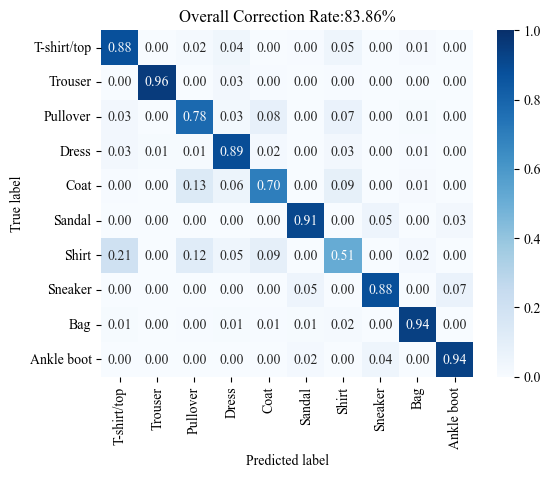

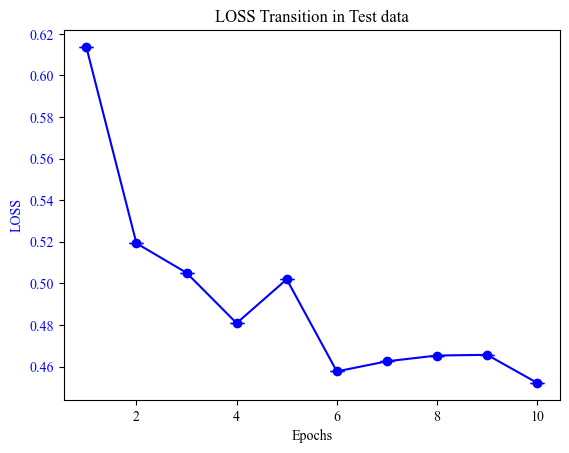

           Average  Best ID       Best  Worst ID      Worst
0   ACC  83.860000        1  83.860000         1  83.860000
1  LOSS   0.452143        1   0.452143         1   0.452143
2  TIME  80.124743        1  80.124743         1  80.124743
/Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_fashion-mnist
Saved at: /Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_fashion-mnist/PM_CNN_6190120.csv


In [4]:
#data---------------------------------------------
dataset = 'fashion-mnist' # 'mnist', 'cifar-10', 'cinic-10' , 'fashion-mnist'
batch_size = 100 #64 MNIST, 100 CIFAR10, 100 CINIC10
#Encoder_Model--------------------------------
enc_type = 'PM' # 'none', 'MZM', 'LI'
cls_type = 'CNN' # 'MLP' or 'CNN'
#class_model--------------------------------------
num_layer = 2
fc ='relu'
#learning-----------------------------------------
loss_func = 'cross_entropy'
optimizer = 'adam'
lr = 0.001
#param--------------------------------------------
num_try = 1
max_epochs = 10
leverage = 8 #enc is not none
kernel_size =4
#save---------------------------------------------
folder = f'Class_{dataset}'
ex_name= f'{enc_type}_{cls_type}'

data_loaders = {
    'cifar-10': load_CIFAR10_data,
    'cinic-10': load_CINIC10_data,
    'mnist': load_MNIST_data,
    'fashion-mnist':load_Fmnist_data
}

data_train,data_test = data_loaders[dataset]()
if enc_type == 'none':
    leverage = 1

All_last_loss = []
All_loss_test = []
All_pro_time = []
All_test_acc = []
for num_times in range(num_try):

    loss_train_,loss_test_,pro_time_,Last_loss_test,Test_acc,all_labels,all_preds = train_nomal(dataset,loss_func,optimizer,lr,num_times,num_try,data_train,data_test,batch_size,device,max_epochs,leverage,enc_type,cls_type,num_layer,fc,kernel_size)

    All_loss_test.append(loss_test_)
    All_pro_time.append(sum(pro_time_))
    All_last_loss.append(Last_loss_test)
    All_test_acc.append(Test_acc)

    plot_loss_curve(loss_train_,loss_test_)
    plot_confusion_matrix(all_labels,all_preds,dataset,Test_acc)

plot_errorbar_losscurve(All_loss_test)
create_table(All_test_acc,All_last_loss,All_pro_time)
save_csv(folder,ex_name,All_loss_test)